Apresentaremos um exemplo de **análise e manipulação de dados** do RAPP utilizando a linguagem de programação Python e algumas de suas bibliotecas mais populares, como **pandas e matplotlib**. Ao longo deste trabalho, exploraremos diferentes aspectos dos dados, como a distribuição geográfica das atividades, a situação cadastral das empresas e outras análises relevantes para obter insights sobre as práticas ambientais e suas tendências ao longo do tempo.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Faz a leitura das primeiras 1000 linhas do arquivo CSV 
df = pd.read_csv('relatorio.csv', encoding='utf-8', sep=';') 

# Imprime as primeiras linhas do DataFrame para primeira ideia e visualização dos dados
df.head()


,CNPJ,Razão Social,Estado,Município,Ano,Certificado,Tipo Certificado,Certificador,Validade,Situação Cadastral
0,00.000.395/0001-22,OSAKA DESENTUPIDORA DEDETIZADORA S/C LTDA.,SAO PAULO,SAO PAULO,2010.0,EM- 0754 - BR,ISO 14000,Outros,09/02/2013,Ativa
1,00.000.410/0001-32,BIOAGRI ANALISES DE ALIMENTOS LTDA,SAO PAULO,SAO PAULO,2010.0,33004000,Outros,Outros,21/09/2017,Encerrado
2,00.000.410/0001-32,BIOAGRI ANALISES DE ALIMENTOS LTDA,SAO PAULO,SAO PAULO,2011.0,3300400,Outros,Outros,21/09/2017,Encerrado
3,00.000.410/0001-32,BIOAGRI ANALISES DE ALIMENTOS LTDA,SAO PAULO,SAO PAULO,2012.0,33004000,Outros,Outros,21/09/2017,Encerrado
4,00.001.388/0002-26,DISTRIBUIDORA BRASILIA DE VEICULOS S/A,DISTRITO FEDERAL,BRASILIA,2003.0,296862,Outros,INSTITUTO DE QUALIDADE AMBIENTAL,31/03/2005,Encerrado


In [53]:
# Fazendo uma pequena limpeza dos dados para melhor análise
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85122 entries, 0 to 91820
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CNPJ                85122 non-null  object 
 1   Razão Social        85122 non-null  object 
 2   Estado              85122 non-null  object 
 3   Município           85122 non-null  object 
 4   Ano                 85122 non-null  float64
 5   Certificado         85122 non-null  object 
 6   Tipo Certificado    85122 non-null  object 
 7   Certificador        85122 non-null  object 
 8   Validade            85122 non-null  object 
 9   Situação Cadastral  85122 non-null  object 
dtypes: float64(1), object(9)
memory usage: 7.1+ MB


* Na relação abaixo, apresentamos a contagem de certificados por estado, permitindo observar que os estados de São Paulo e Minas Gerais são responsáveis por mais de 50% de todos os certificados RAPP entregues no Brasil durante os anos mencionados na base de dados. Essa concentração de certificados nesses dois estados aponta para uma relevância significativa de suas atividades potencialmente poluidoras no cenário ambiental do país. Essas informações podem ser fundamentais para orientar políticas de preservação ambiental e o monitoramento de práticas sustentáveis em todo o território nacional.

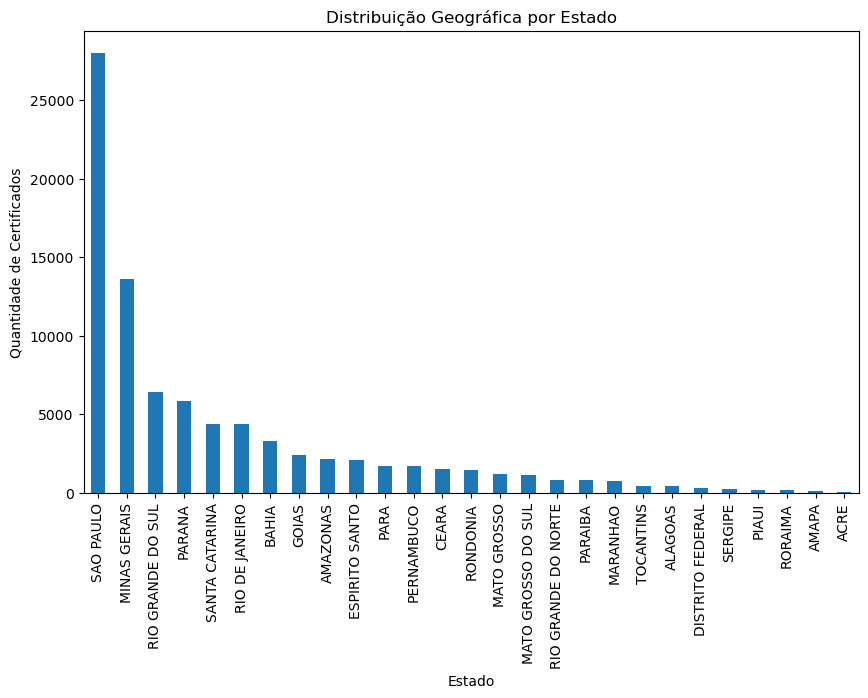

In [55]:
# Contagem de certificados por estado
certificados_por_estado = df['Estado'].value_counts()

# Gráfico de barras da distribuição geográfica por estado
plt.figure(figsize=(10, 6))
certificados_por_estado.plot(kind='bar')
plt.title('Distribuição Geográfica por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Certificados')
plt.show()


A seguir, apresentamos a contagem de certificados por município, destacando os 10 municípios que mais entregam relatórios. Essa análise permite identificar os principais locais onde as atividades potencialmente poluidoras são mais frequentes e evidencia a importância desses municípios na prestação de informações ambientais. Com essa visão detalhada, é possível direcionar ações específicas para essas regiões, visando aprimorar a gestão ambiental e promover práticas mais sustentáveis, tanto por parte das empresas quanto dos órgãos responsáveis pela fiscalização e controle ambiental.

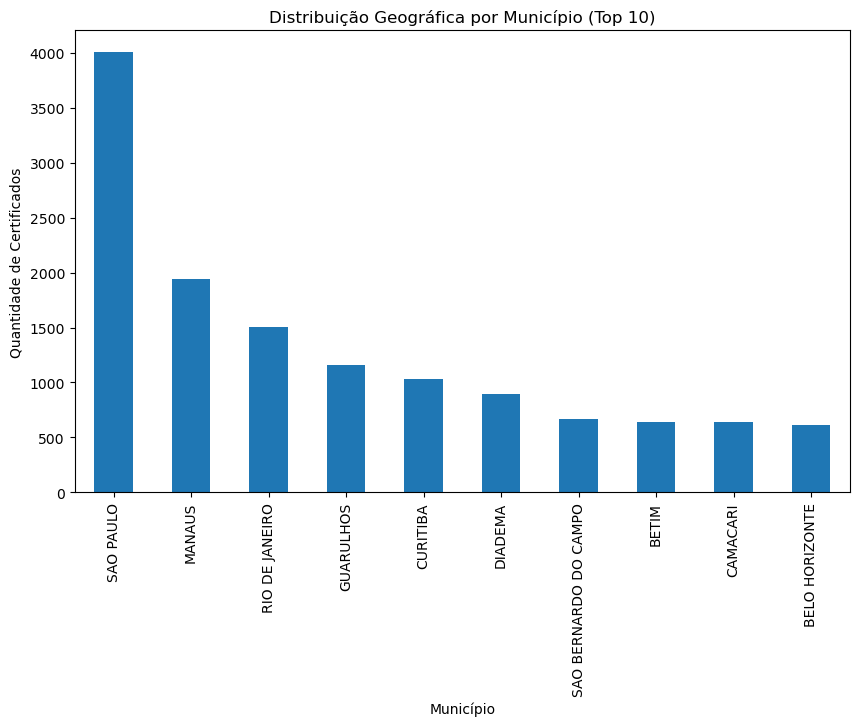

In [60]:
# Contagem de certificados por município
certificados_por_municipio = df['Município'].value_counts()

# Gráfico de barras da distribuição geográfica por município (apenas os 10 mais frequentes)
plt.figure(figsize=(10, 6))
certificados_por_municipio[:10].plot(kind='bar')
plt.title('Distribuição Geográfica por Município (Top 10)')
plt.xlabel('Município')
plt.ylabel('Quantidade de Certificados')
plt.show()


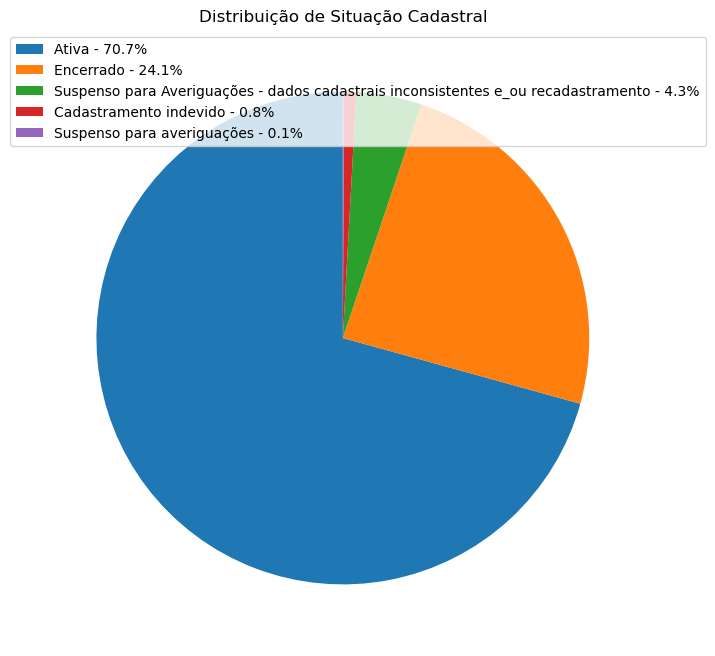

In [59]:
# Contagem de certificados por situação cadastral
certificados_por_situacao = df['Situação Cadastral'].value_counts()

# Cálculo das porcentagens
porcentagens = (certificados_por_situacao / certificados_por_situacao.sum()) * 100

# Criando lista com os rótulos personalizados contendo a legenda e a porcentagem
labels = [f'{cert} - {por:.1f}%' for cert, por in zip(certificados_por_situacao.index, porcentagens)]

# Gráfico de pizza da distribuição de situação cadastral
plt.figure(figsize=(8, 8))
plt.pie(certificados_por_situacao, labels=None, autopct=None, startangle=90)
plt.title('Distribuição de Situação Cadastral')
plt.legend(labels, loc='upper right', bbox_to_anchor=(1.1, 1))
plt.ylabel('')
plt.show()


Através do gráfico de pizza acima, podemos visualizar a contagem de certificados por situação cadastral. Observamos que mais de 70% dos certificados possuem situação cadastral ativa, indicando que a maioria das empresas estava em conformidade com as obrigações ambientais. Além disso, cerca de 24% dos certificados estão na situação de "encerrado", o que pode sinalizar o cumprimento de determinadas atividades e finalização de projetos.

Por outro lado, mais de 4% dos certificados estão classificados como "suspenso para averiguações", o que sugere que essas empresas estão passando por análises e investigações por parte dos órgãos ambientais. Essa categoria merece atenção especial, pois pode envolver casos de não conformidade ou infrações ambientais que requerem investigações mais aprofundadas.